<a href="https://colab.research.google.com/github/hinatanvir/Fault-Detection-SECOM/blob/main/Fault_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import statistics
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import statistics as stat
from scipy.stats import binom
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Rectangle
# splitting merge_data into train test and split
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import normaltest
import os 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')



# Read Files

In [42]:
def read_secom():
    path = 'secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature'+str(x+1) for x in range(len(df.columns))]
    return df


#%%
def read_labels():
    path = 'secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#read 2 df 
df_features = read_secom()
df_target = read_labels()

In [43]:
df_features.columns = ['feature'+str(x+1) for x in range(len(df_features.columns))]

In [44]:
df_target.columns=['status','timestamp']

# Merge Data

In [45]:
#converting timestamp to datetime format, dayfirst=True arg ensures days and month dont switch 
#for dates lesser than 13 
df_target['timestamp']=pd.to_datetime(df_target['timestamp'],dayfirst=True)

In [46]:
#check format of dates for lesser than 13 
mask = (df_target['timestamp'] > '2008-08-11 00:00:00') & (df_target['timestamp'] <= '2008-08-16 00:00:00')
filtered_df=df_target.loc[mask]
print(filtered_df)

     status           timestamp
190      -1 2008-08-11 03:06:00
191      -1 2008-08-11 04:09:00
192      -1 2008-08-11 05:15:00
193      -1 2008-08-11 11:35:00
194      -1 2008-08-11 12:38:00
195      -1 2008-08-12 04:23:00
196      -1 2008-08-12 06:16:00
197      -1 2008-08-12 10:54:00
198      -1 2008-08-12 11:29:00
199      -1 2008-08-12 12:04:00
200      -1 2008-08-13 02:48:00
201      -1 2008-08-15 03:26:00
202      -1 2008-08-15 04:14:00
203      -1 2008-08-15 05:13:00
204      -1 2008-08-15 09:38:00
205      -1 2008-08-15 10:14:00
206      -1 2008-08-15 11:42:00
207      -1 2008-08-15 18:19:00
208      -1 2008-08-15 19:19:00
209      -1 2008-08-15 20:00:00
210      -1 2008-08-15 20:03:00
211      -1 2008-08-15 23:31:00


In [47]:
df= pd.concat([df_features,df_target],axis=1)
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,status,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,2008-10-16 15:13:00
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,2008-10-16 20:49:00
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,2008-10-17 05:26:00
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,2008-10-17 06:01:00


# Frequency distribution of target values

<AxesSubplot:>

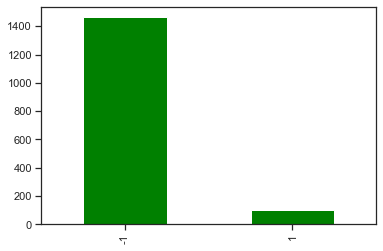

In [48]:
#frequency distribution of target values
df.status.value_counts().plot(kind = 'bar',color='green')

In [49]:


df_data = read_secom()
df_label = read_labels()
df = pd.concat([df_data,df_label],axis=1)
print(df.head())
# %%
#goal: go through each columns for their stats


   feature1  feature2   feature3   feature4  feature5  feature6  feature7  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3   2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   

   feature8  feature9  feature10  ...  feature583  feature584  feature585  \
0    0.1242    1.5005     0.0162  ...      0.5005      0.0118      0.0035   
1    0.1247    1.4966    -0.0005  ...      0.5019      0.0223      0.0055   
2    0.1241    1.4436     0.0041  ...      0.4958      0.0157      0.0039   
3    0.1217    1.4882    -0.0124  ...      0.4990      0.0103      0.0025   
4    0.1235    1.5031    -0.0031  ...      0.4800      0.4766      0.1045   

   feature586  feature587  feature588  feature589  feature590  status  \
0

In [50]:

#step 1: create a dict
result = {}
print(df['feature1'].std())

for col in df_data.columns:
    std = df_data[col].std()
    mean = df_data[col].mean()
    list = []
    list.append(std)
    list.append(mean)
    result[col] = list

#step 2: convert dict into df
df_EDA = pd.DataFrame.from_dict(result,orient='index')
df_EDA.columns = ['std','mean']
print(df_EDA.head())

73.62178674853081
                 std         mean
feature1   73.621787  3014.452896
feature2   80.407705  2495.850231
feature3   29.513152  2200.547318
feature4  441.691640  1396.376627
feature5   56.355540     4.197013


In [51]:
df_EDA.describe()

,std,mean
count,590.000000,590.000000
mean,58.909076,87.209979
std,387.434060,609.822057
min,0.000000,-5618.393610
25%,0.003138,0.001578
50%,0.176879,0.761510
75%,6.303327,10.135639
max,6553.569317,8827.536865


In [52]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,status
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


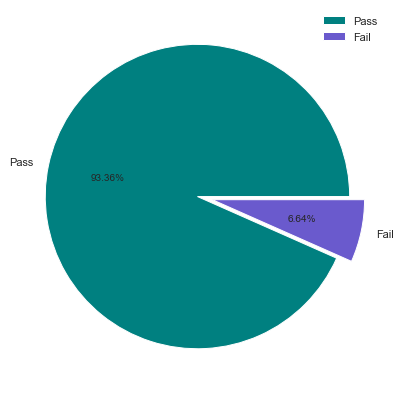

-1    1463
 1     104
Name: status, dtype: int64

In [53]:
#pie chart for 'status(fail-pass)
plt.rcParams['figure.figsize'] = (7,7)
labels = ['Pass', 'Fail']
size = df['status'].value_counts()
colors = ['teal', 'slateblue']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%")
plt.axis('off')
plt.legend()
plt.show()
df['status'].value_counts()

In [54]:
#descriptive analysis
def eda(df,output):
    #output={}
    for col in df.columns:
        mean=df[col].mean()
        std= df[col].std()
        percent_null= pd.isnull(df[col]).sum()/len(df[col])*100
        unique=len(pd.unique(df[col]))
        outlier_df3= df[(np.abs(stats.zscore(df[col])) > 3)]
        outlier_df2= df[(np.abs(stats.zscore(df[col])) > 2)]
        count_3s_perc=len(outlier_df3)*100/len(df)
        count_2s_perc=(len(outlier_df2)-len(outlier_df3))*100/len(df)
        min= df[col].min()
        q25=df[col].quantile(0.25)
        q50=df[col].quantile(0.5)
        q75=df[col].quantile(0.75)
        max= df[col].max()
        skewness=df[col].skew()
        kurtosis=df[col].kurtosis()
        list = []
        list.append(mean)
        list.append(std)
        list.append(percent_null)
        list.append(unique)
        list.append(count_3s_perc)
        list.append(count_2s_perc)
        list.append(min)
        list.append(q25)
        list.append(q50)
        list.append(q75)
        list.append(max)
        list.append(skewness)
        list.append(kurtosis)
        output[col] = list
    return output;

In [55]:
#dictionary for EDA
result={}
result=eda(df_features,result)
result1=pd.DataFrame.from_dict(result,orient='index')
result1.columns=['mean','std', 'percent_null', 'unique', 'count_3s_perc', 'count_2s_perc', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']
result1

,mean,std,percent_null,unique,count_3s_perc,count_2s_perc,min,q25,q50,q75,max,skewness,kurtosis
feature1,3014.452896,73.621787,0.382897,1521,0.0,0.0,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500,0.513657,1.470652
feature2,2495.850231,80.407705,0.446713,1505,0.0,0.0,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400,-0.043066,2.241442
feature3,2200.547318,29.513152,0.893427,508,0.0,0.0,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667,-0.305764,2.304955
feature4,1396.376627,441.691640,0.893427,519,0.0,0.0,0.0000,1081.875800,1285.21440,1591.223500,3715.0417,1.711627,4.594917
feature5,4.197013,56.355540,0.893427,504,0.0,0.0,0.6815,1.017700,1.31680,1.525700,1114.5366,19.645262,384.452750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature586,3.067826,3.578033,0.063816,1503,0.0,0.0,1.1975,2.306500,2.75765,3.295175,99.3032,24.697136,659.562151
feature587,0.021458,0.012358,0.063816,323,0.0,0.0,-0.0169,0.013425,0.02050,0.027600,0.1028,1.438025,6.975957
feature588,0.016475,0.008808,0.063816,261,0.0,0.0,0.0032,0.010600,0.01480,0.020300,0.0799,1.947408,7.092926
feature589,0.005283,0.002867,0.063816,121,0.0,0.0,0.0010,0.003300,0.00460,0.006400,0.0286,2.029372,8.238837


# Missing Values

In [56]:
#Checking if there is any missing value in the data 
df.isna().any().any()

True

In [57]:
#percentage of null values for each column
df_nulls = df.isna().sum()/(len(df))*100

In [58]:
df_nulls

feature1      0.382897
feature2      0.446713
feature3      0.893427
feature4      0.893427
feature5      0.893427
                ...   
feature588    0.063816
feature589    0.063816
feature590    0.063816
status        0.000000
timestamp     0.000000
Length: 592, dtype: float64

In [59]:
df.loc[:, df.isnull().any()].columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10',
       ...
       'feature581', 'feature582', 'feature583', 'feature584', 'feature585',
       'feature586', 'feature587', 'feature588', 'feature589', 'feature590'],
      dtype='object', length=538)

In [60]:
merge_data= pd.concat([df_features,df_target],axis=1)

In [61]:
df_nulls=pd.DataFrame(df_nulls)
df_nulls

,0
feature1,0.382897
feature2,0.446713
feature3,0.893427
feature4,0.893427
feature5,0.893427
...,...
feature588,0.063816
feature589,0.063816
feature590,0.063816
status,0.000000


In [62]:
print("Column with lowest amount of missings contains {} % missings.".format(df_nulls.min()))
print("Column with highest amount of missings contains {} % missings.".format(df_nulls.max()))

Column with lowest amount of missings contains 0    0.0
dtype: float64 % missings.
Column with highest amount of missings contains 0    91.193363
dtype: float64 % missings.


In [63]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [64]:
df_na = null_values(df_features)
df_na

,Missing_Records,Percentage (%)
feature293,1429,91.193363
feature294,1429,91.193363
feature158,1429,91.193363
feature159,1429,91.193363
feature359,1341,85.577537
...,...,...
feature457,1,0.063816
feature219,1,0.063816
feature357,1,0.063816
feature458,1,0.063816


In [65]:
#general arrangement for visualization 
large = 16; med = 12; small = 8
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

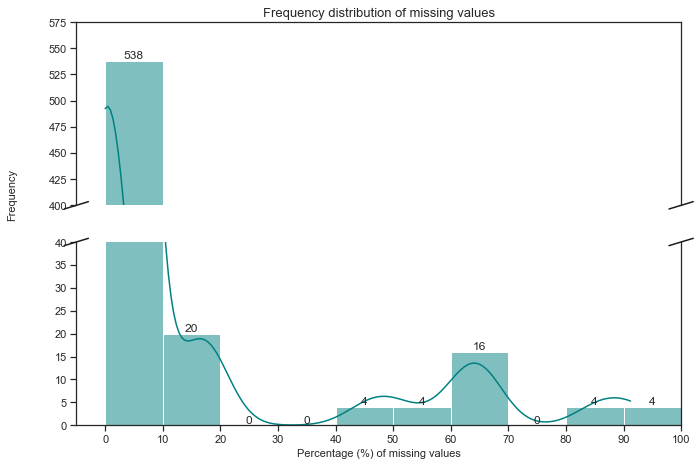

In [66]:
#broken axis bar chart for percentage of missing values before splitting data 
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")

pal = sns.color_palette(n_colors=3)

f, (ax1,ax2)= plt.subplots(2,1,sharex = True,sharey=False,figsize=(12, 8))
ax1 = sns.histplot(x="percent_null",
                   data=result1, palette=pal, ax=ax1,kde= True, bins=(0,10,20,30,40,50,60,70,80,90,100),color="teal")
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")

ax2 = sns.histplot(x="percent_null",
                   data=result1, palette=pal, ax=ax2,kde= True,bins=(0,10,20,30,40,50,60,70,80,90,100), color="teal")

ax1.set_title('Frequency distribution of missing values', fontsize=13)

ax2.bar_label(ax2.containers[0])
ax1.bar_label(ax1.containers[0])

plt.xticks(rotation=0,fontsize=11)

ax1.set_ylim(400, 575)
ax2.set_ylim(0, 40)
plt.xlim(-5, 100)
plt.xticks([0, 10,20, 30, 40, 50, 60, 70, 80,90, 100, ])

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Percentage (%) of missing values",size=11)
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.07, 0.55,"Frequency", va="center", rotation="vertical",size=11)

ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.show()

In [67]:
#features that have missing values bigger than 5%
df_na_1 = df_na[df_na["Percentage (%)"] > 15]
df_na_1

,Missing_Records,Percentage (%)
feature293,1429,91.193363
feature294,1429,91.193363
feature158,1429,91.193363
feature159,1429,91.193363
feature359,1341,85.577537
feature86,1341,85.577537
feature493,1341,85.577537
feature221,1341,85.577537
feature519,1018,64.964901
feature247,1018,64.964901


Text(0.5, 1.0, 'Percentage of Missing Values > 15% per feature ')

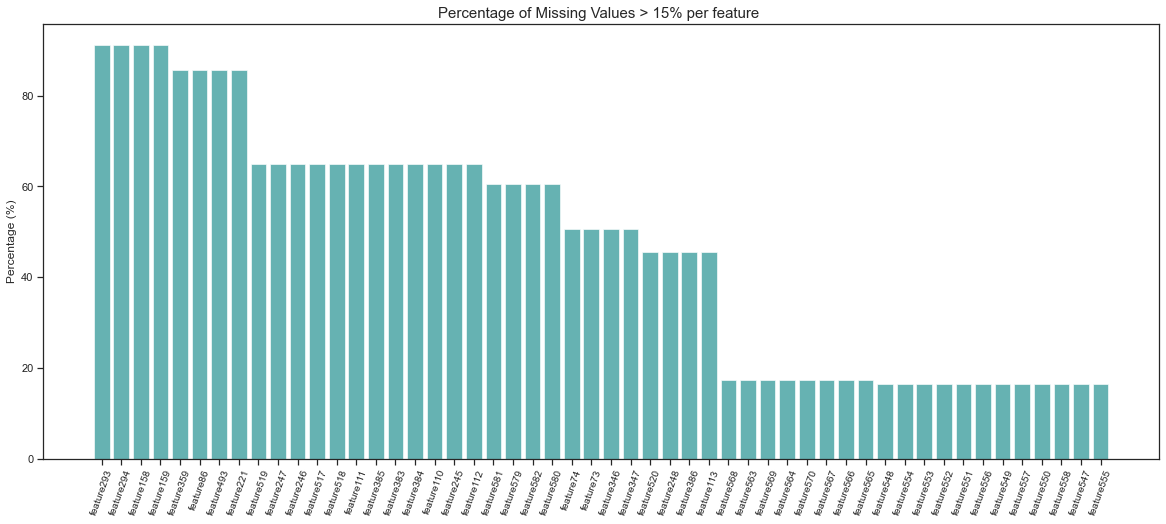

In [68]:
# percantage of missing values for each feature > 5%
plt.rcParams['figure.figsize'] = (20, 8)
df_nulls_3 = plt.bar(x=df_na_1.index, height= df_na_1['Percentage (%)'], facecolor='teal', alpha=0.6)
plt.xticks(rotation=70,fontsize=10)
plt.ylabel("Percentage (%)",size=12)
plt.title("Percentage of Missing Values > 15% per feature ",size=15)
 

In [69]:
df_na_sort= pd.DataFrame(df_na['Percentage (%)'].sort_values(ascending=False))
df_na_sort

,Percentage (%)
feature293,91.193363
feature159,91.193363
feature294,91.193363
feature158,91.193363
feature86,85.577537
...,...
feature584,0.063816
feature585,0.063816
feature586,0.063816
feature588,0.063816


In [70]:
df_descriptive=df.describe().transpose()

In [71]:
df_std=df_features.std()
df.std()

feature1                       73.621787
feature2                       80.407705
feature3                       29.513152
feature4                       441.69164
feature5                        56.35554
                         ...            
feature588                      0.008808
feature589                      0.002867
feature590                     93.891919
status                           0.49801
timestamp     22 days 15:52:35.606333074
Length: 592, dtype: object

In [72]:
#Observation is that most of the variables distribution are right skewed with long tails and outliers 
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout() 
    plt.show()

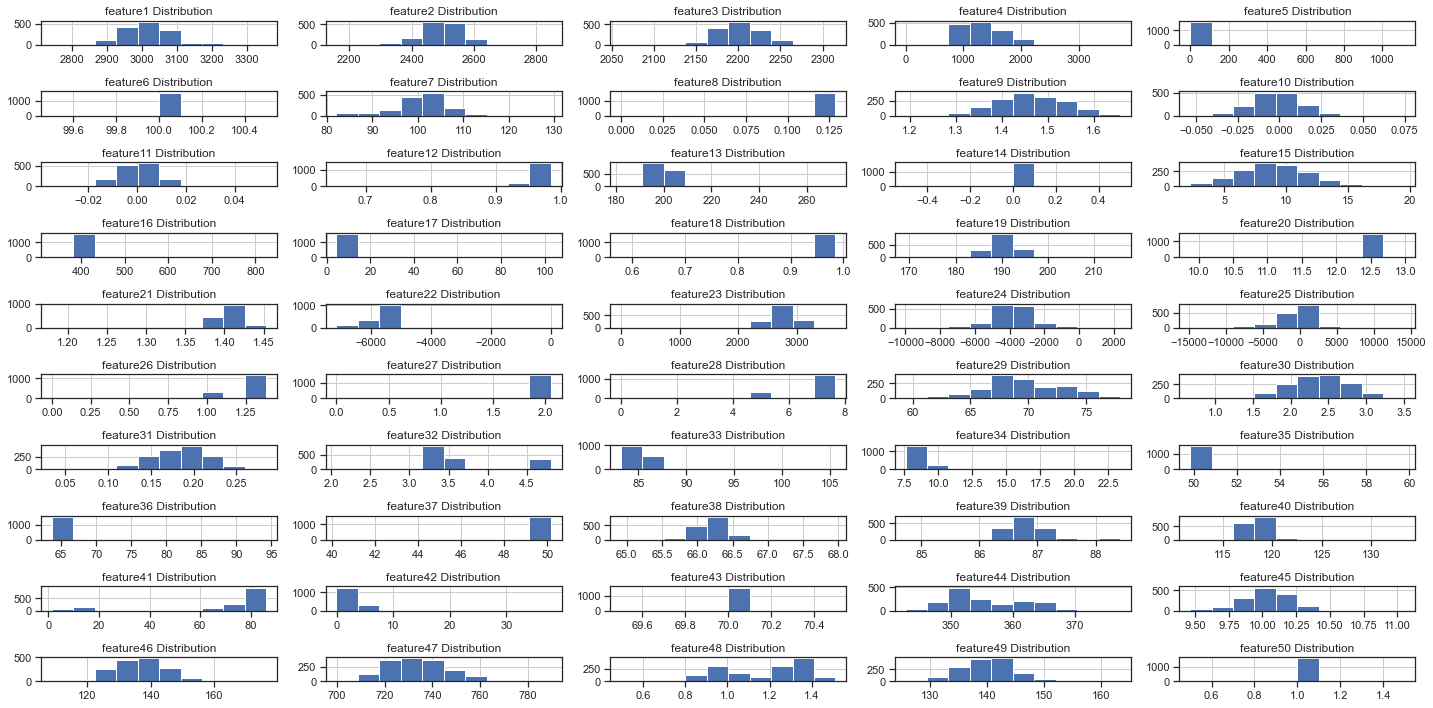

In [73]:
# general idea how skewed data
draw_histograms(df, df.iloc[:,0:50], 10, 5)

In [74]:
df.iloc[:, 0:590]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [75]:
df_eda=df.describe().T

In [76]:
#number of features with zero std 
df_eda[df_eda['std']==0]

,count,mean,std,min,25%,50%,75%,max
feature6,1553.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
feature14,1564.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature43,1566.0,70.0,0.0,70.0,70.0,70.0,70.0,70.0
feature50,1566.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
feature53,1566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
feature535,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature536,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature537,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature538,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Volatility 

In [77]:
#scaling data for volatility check 
scaler = MinMaxScaler()
df_features= read_secom()
df_target = read_labels()
#It seems like the Scaler works only with series. When we scale the whole dataframe, the datafram will be broken down.
#Then we need to form the dataframe again.
df_features_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)
df_features_scaled

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.0,0.328562,0.965785,0.665019,0.542479,...,NaN,NaN,0.709375,0.012325,0.017510,0.011880,NaN,NaN,NaN,NaN
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.0,0.428942,0.969673,0.656639,0.412315,...,0.181159,0.282386,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386
2,0.308868,0.583388,0.493903,0.457065,0.000744,0.0,0.283455,0.965008,0.542759,0.448168,...,0.500000,0.112383,0.562500,0.020612,0.021401,0.020152,0.629073,0.589309,0.500000,0.112383
3,0.400385,0.466998,0.543479,0.244894,0.000574,0.0,0.469123,0.946345,0.638590,0.319564,...,0.123188,0.100153,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153
4,0.471367,0.500400,0.678327,0.357067,0.000765,0.0,0.387631,0.960342,0.670606,0.392050,...,NaN,NaN,0.068750,1.000000,1.000000,1.000000,0.309942,0.152542,0.123188,0.100153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.254718,0.444401,0.467675,0.830510,0.000721,0.0,0.002453,0.970451,0.325312,0.381138,...,0.134058,0.275560,0.656250,0.017637,0.021401,0.017016,0.197995,0.138201,0.134058,0.275560
1563,0.504102,0.529017,0.541646,0.302731,0.000175,0.0,0.346719,0.937014,0.520627,0.368667,...,NaN,NaN,0.615625,0.015087,0.018482,0.014538,0.197995,0.138201,0.134058,0.275560
1564,0.384221,0.321409,0.572020,0.298919,0.000128,0.0,0.366738,0.939347,NaN,NaN,...,0.054348,0.059030,0.653125,0.019762,0.023346,0.018974,0.305764,0.070404,0.054348,0.059030
1565,0.247394,0.542774,0.457071,0.318631,0.000800,0.0,0.353699,0.943235,0.582725,0.360094,...,0.235507,0.126805,0.706250,0.025074,0.020428,0.024144,0.360067,0.277705,0.235507,0.126805


In [78]:
df_eda4 = df_features.describe().T

In [79]:
df_eda4

,count,mean,std,min,25%,50%,75%,max
feature1,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
feature2,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
feature3,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
feature4,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
feature5,1553.0,4.197013,56.355540,0.6815,1.017700,1.31680,1.525700,1114.5366
...,...,...,...,...,...,...,...,...
feature586,1566.0,3.067826,3.578033,1.1975,2.306500,2.75765,3.295175,99.3032
feature587,1566.0,0.021458,0.012358,-0.0169,0.013425,0.02050,0.027600,0.1028
feature588,1566.0,0.016475,0.008808,0.0032,0.010600,0.01480,0.020300,0.0799
feature589,1566.0,0.005283,0.002867,0.0010,0.003300,0.00460,0.006400,0.0286


In [81]:
df_eda = df_features_scaled.describe().T
df_eda

,count,mean,std,min,25%,50%,75%,max
feature1,1561.0,0.442356,0.120079,0.0,0.363752,0.437523,0.511181,1.0
feature2,1560.0,0.490192,0.116924,0.0,0.426788,0.495361,0.552680,1.0
feature3,1553.0,0.549425,0.115917,0.0,0.472825,0.551465,0.618191,1.0
feature4,1553.0,0.375871,0.118893,0.0,0.291215,0.345949,0.428319,1.0
feature5,1553.0,0.003156,0.050595,0.0,0.000302,0.000570,0.000758,1.0
...,...,...,...,...,...,...,...,...
feature586,1566.0,0.019064,0.036471,0.0,0.011304,0.015903,0.021382,1.0
feature587,1566.0,0.320455,0.103243,0.0,0.253342,0.312448,0.371763,1.0
feature588,1566.0,0.173076,0.114831,0.0,0.096480,0.151239,0.222947,1.0
feature589,1566.0,0.155193,0.103879,0.0,0.083333,0.130435,0.195652,1.0


In [82]:
df_eda1= df_features.describe().T

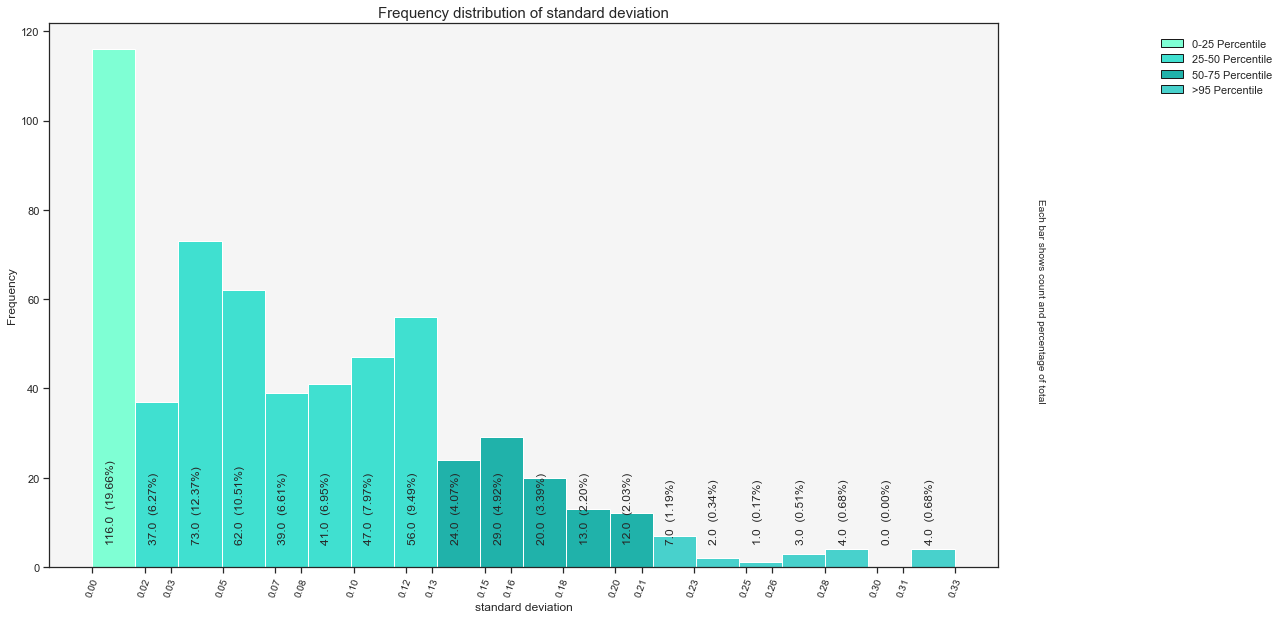

In [85]:
# volatility histogram without line
# Colours for different percentiles
perc_25_colour = 'aquamarine'
perc_50_colour = 'turquoise'
perc_75_colour = 'lightseagreen'
perc_95_colour = 'mediumturquoise'

fig, ax = plt.subplots(figsize=(17,10))

counts, bins, patches = ax.hist(df_eda['std'], facecolor=perc_50_colour, bins=20, edgecolor='white')

ax.set_xticks(bins.round(2))
plt.xticks(rotation=70,fontsize=10)

ax.set_title('Frequency distribution of standard deviation', fontsize=15)
ax.set_xlabel('standard deviation', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

twentyfifth, seventyfifth, ninetyfifth = np.percentile(df_eda['std'], [25, 75, 95])
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

ax.annotate('Each bar shows count and percentage of total',
            xy=(.85,.30), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=10, bbox=dict(boxstyle="round", fc="white"),
            rotation=-90)

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

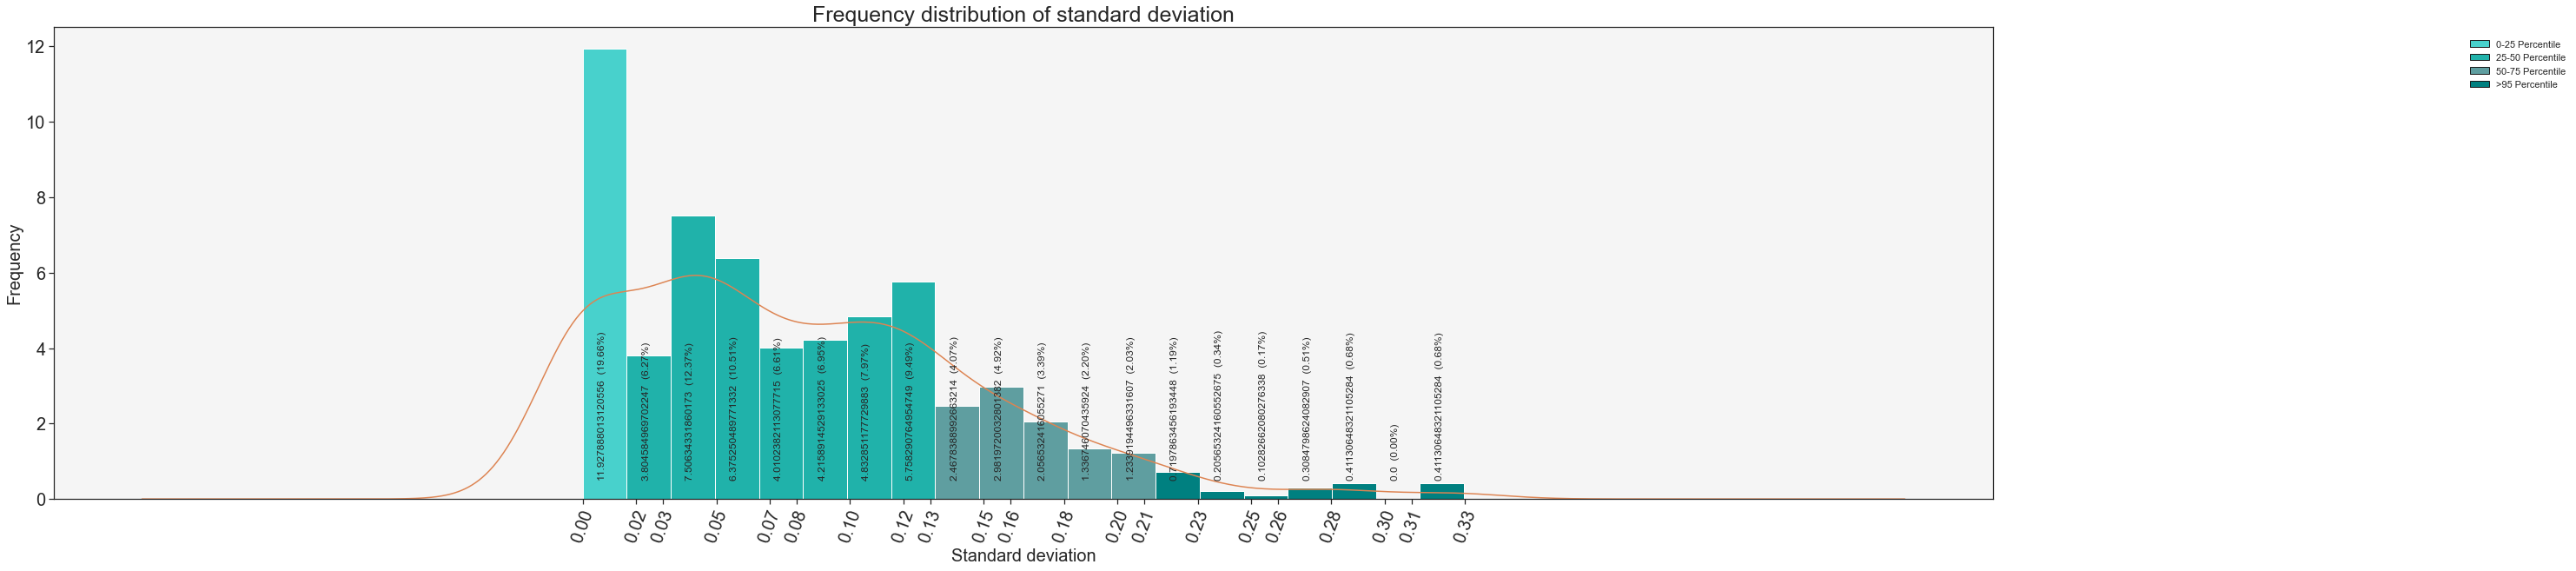

In [86]:
# volatility histogram with line
# Colours for different percentiles
perc_25_colour = 'mediumturquoise'
perc_50_colour = 'lightseagreen'
perc_75_colour = 'cadetblue'
perc_95_colour = 'teal'

# Plot the Histogram 
fig, ax = plt.subplots(figsize=(40,10))

counts, bins, patches = ax.hist(df_eda['std'], facecolor=perc_50_colour, bins=20, edgecolor='white',density=True)

df_eda['std'].plot(kind = "kde")

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20)

# Set the graph title and axes titles
ax.set_title('Frequency distribution of standard deviation', fontsize=25)
ax.set_xlabel('Standard deviation', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)


# Change the colors of bars at the edges
twentyfifth, seventyfifth, ninetyfifth = np.percentile(df_eda['std'], [25, 75, 95])
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        

bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')


#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

In [87]:
df_eda_sort = df_eda['std'].sort_values(ascending=False)

In [88]:
result1['percent_null'].value_counts().sort_index()

0.000000      52
0.063816      92
0.127632      84
0.191449      24
0.255265      24
0.319081       3
0.382897     100
0.446713      20
0.510530      12
0.574346      48
0.638162       4
0.765795       4
0.893427      20
1.531589      43
3.254627       8
16.592214     12
17.421825      8
45.628590      4
50.670070      4
60.561583      4
64.964901     12
85.577537      4
91.193363      4
Name: percent_null, dtype: int64

# Splitting data and New Charts

In [89]:
#data set accoring to pass or fail 
#unique_vals = merge_data['status'].unique()  # [0, 1, 2]
#targets = [merge_data.loc[merge_data['status'] == val] for val in unique_vals]
merge_data
#separate target variable and remaining data
x = merge_data.iloc[:,:590]
y = merge_data.iloc[:,590]
y

0      -1
1      -1
2       1
3      -1
4      -1
       ..
1562   -1
1563   -1
1564   -1
1565   -1
1566   -1
Name: status, Length: 1567, dtype: int64


# splitting merge_data into train test and split

<AxesSubplot:>

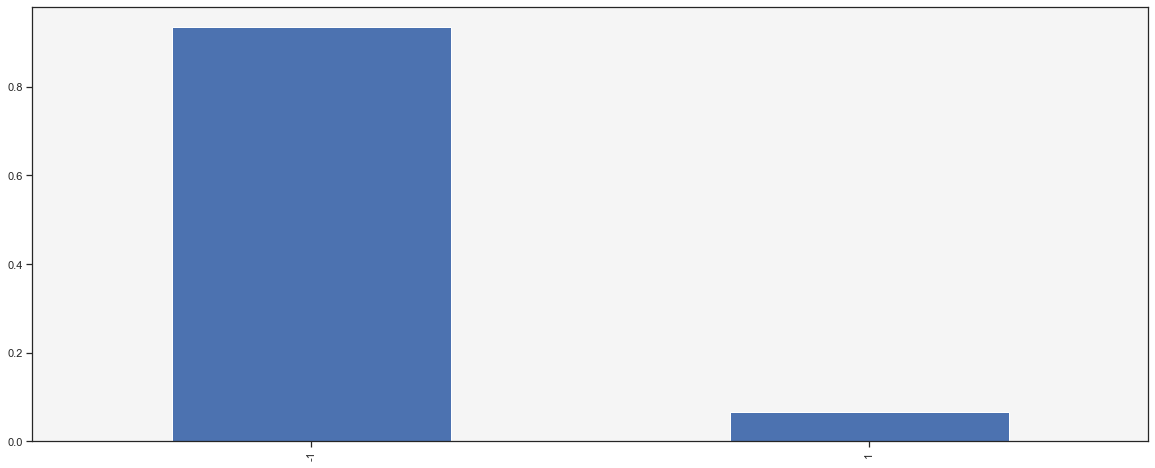

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1,stratify=y)# random state = fix the random generator (same data all time)
#startify preserves the same proportions of examples in each class as observed in the original dataset- imbalance data .
#frequency count of target varaible in training and test data separately (after splitting)
#x_train - 1253.590
#x_test - 314.590
#y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)
y_train.value_counts(normalize=True).plot(kind='bar')

In [91]:
x_train
##proceeding with only training data 
#analysis of volatility and null values of training data 
#xtrain_desc = x_train.describe()
xtrain_eda={}
xtrain_eda=eda(x_train,xtrain_eda)
xtrain_eda1=pd.DataFrame.from_dict(xtrain_eda,orient='index')
xtrain_eda1.columns=['mean','std', 'percent_null', 'unique', 'count_3s', 'count_2s', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']
#Percent_null of features before split 
#sns.histplot(data=result1, x='percent_null',bins=20, kde=True)
xtrain_eda1

,mean,std,percent_null,unique,count_3s,count_2s,min,q25,q50,q75,max,skewness,kurtosis
feature1,3014.113686,73.877303,0.399042,1227,0.0,0.0,2743.2400,2966.2300,3011.40500,3056.310000,3356.3500,0.543580,1.589958
feature2,2496.400585,79.188651,0.478851,1213,0.0,0.0,2162.8700,2452.3350,2500.38000,2539.600000,2846.4400,-0.050951,2.281719
feature3,2200.216525,29.939025,0.798085,479,0.0,0.0,2060.6600,2180.8611,2200.98890,2218.055500,2315.2667,-0.393137,2.541922
feature4,1394.907987,436.632421,0.798085,490,0.0,0.0,0.0000,1083.8858,1283.43680,1593.122000,3715.0417,1.609379,4.102406
feature5,4.018582,54.572445,0.798085,478,0.0,0.0,0.6815,1.0160,1.31710,1.525700,1114.5366,20.304107,410.943471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature586,3.084501,3.968128,0.079808,1208,0.0,0.0,1.1975,2.3058,2.74655,3.258475,99.3032,22.636508,545.053032
feature587,0.021521,0.012421,0.079808,306,0.0,0.0,-0.0060,0.0134,0.02070,0.027600,0.1028,1.571819,7.780914
feature588,0.016344,0.008698,0.079808,249,0.0,0.0,0.0042,0.0106,0.01480,0.019800,0.0799,2.082862,8.230885
feature589,0.005248,0.002850,0.079808,117,0.0,0.0,0.0012,0.0033,0.00460,0.006300,0.0286,2.137793,9.345498


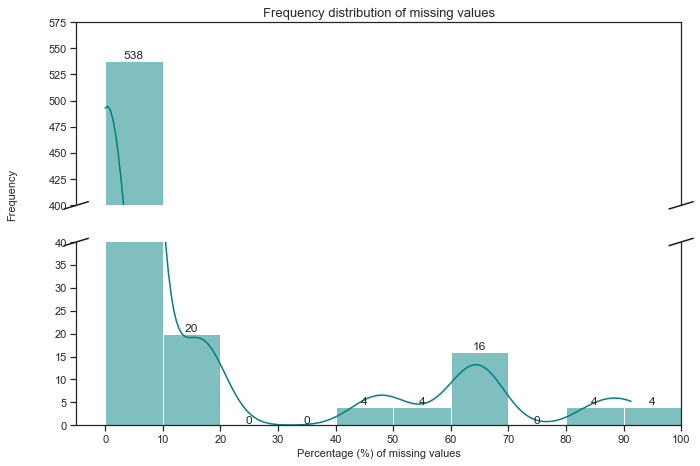

In [92]:
#Missing values after splitting data 
#broken axis bar chart for percentage of missing_values
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")

pal = sns.color_palette(n_colors=3)

f, (ax1,ax2)= plt.subplots(2,1,sharex = True,sharey=False,figsize=(12, 8))
ax1 = sns.histplot(x="percent_null",
                   data=xtrain_eda1, palette=pal, ax=ax1,kde= True, bins=(0,10,20,30,40,50,60,70,80,90,100),color="teal")
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")

ax2 = sns.histplot(x="percent_null",
                   data=xtrain_eda1, palette=pal, ax=ax2,kde= True,bins=(0,10,20,30,40,50,60,70,80,90,100), color="teal")

ax1.set_title('Frequency distribution of missing values', fontsize=13)

ax2.bar_label(ax2.containers[0])
ax1.bar_label(ax1.containers[0])

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=0,fontsize=11)

ax1.set_ylim(400, 575)
ax2.set_ylim(0, 40)
plt.xlim(-5, 100)
plt.xticks([0, 10,20, 30, 40, 50, 60, 70, 80,90, 100, ])

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Percentage (%) of missing values",size=11)

f.text(0.07, 0.55,"Frequency", va="center", rotation="vertical",size=11)

# Ticks on the top of the upper part and bottom of the lower part for style
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
d = .02  

kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.show()

In [93]:
result = []
i = 0

In [95]:
#find the duplicated features (columns)
def remove_duplicated_columns(df):
    dict_duplicate_pair = {}
    dict_duplicate_matches = {}
    list_duplicate = []
    to_remove = []
    for i in range(0, len(df.columns)):
        l = []
        for j in range(i+1,len(df.columns)):
            dict_duplicate_pair[str(i+1)+';'+str(j+1)] = df.iloc[:,i].equals(df.iloc[:,j])
            if df.iloc[:,i].equals(df.iloc[:,j]) == True:
                if j not in list_duplicate:
                    l.append(j)
                    to_remove.append('feature_'+str(j+1))
                list_duplicate.append(i)
                list_duplicate.append(j)
        if len(l)!=0:
            dict_duplicate_matches[i] = l


    df_duplicate_pair = pd.DataFrame.from_dict(dict_duplicate_pair, orient='index')
    df_duplicate_pair.columns=['duplicate']

    df_duplicate_matches = pd.DataFrame.from_dict(dict_duplicate_matches, orient='index')

    
    df = df.drop(columns=to_remove, axis = 1)

    return df


In [96]:
x_train = remove_duplicated_columns(x_train)

KeyError: "['feature_150', 'feature_285', 'feature_423', 'feature_180', 'feature_187', 'feature_190', 'feature_316', 'feature_323', 'feature_326', 'feature_452', 'feature_459', 'feature_462', 'feature_227', 'feature_230', 'feature_231', 'feature_232', 'feature_233', 'feature_234', 'feature_235', 'feature_236', 'feature_237', 'feature_238', 'feature_241', 'feature_242', 'feature_243', 'feature_244', 'feature_365', 'feature_370', 'feature_371', 'feature_372', 'feature_373', 'feature_374', 'feature_375', 'feature_376', 'feature_379', 'feature_380', 'feature_381', 'feature_382', 'feature_499', 'feature_502', 'feature_503', 'feature_504', 'feature_505', 'feature_506', 'feature_507', 'feature_508', 'feature_509', 'feature_510', 'feature_513', 'feature_514', 'feature_515', 'feature_516', 'feature_277', 'feature_415', 'feature_314', 'feature_315', 'feature_450', 'feature_451', 'feature_192', 'feature_193', 'feature_194', 'feature_195', 'feature_327', 'feature_328', 'feature_329', 'feature_330', 'feature_331', 'feature_463', 'feature_464', 'feature_465', 'feature_466', 'feature_467', 'feature_258', 'feature_259', 'feature_260', 'feature_261', 'feature_262', 'feature_263', 'feature_264', 'feature_265', 'feature_266', 'feature_267', 'feature_395', 'feature_396', 'feature_397', 'feature_398', 'feature_399', 'feature_400', 'feature_401', 'feature_402', 'feature_403', 'feature_404', 'feature_405', 'feature_529', 'feature_530', 'feature_531', 'feature_532', 'feature_533', 'feature_534', 'feature_535', 'feature_536', 'feature_537', 'feature_538', 'feature_539'] not found in axis"

In [ ]:
x_train
##proceeding with only training data 
#analysis of volatility and null values of training data 
#xtrain_desc = x_train.describe()
xtrain_eda={}
xtrain_eda=eda(x_train,xtrain_eda)
xtrain_eda1=pd.DataFrame.from_dict(xtrain_eda,orient='index')
xtrain_eda1.columns=['mean','std', 'percent_null', 'unique', 'count_3s', 'count_2s', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']
#Percent_null of features before split 
#sns.histplot(data=result1, x='percent_null',bins=20, kde=True)
xtrain_eda1

In [ ]:
gxgdgd

In [ ]:
#checking features with zero standard deviation
xtrain_eda1[xtrain_eda1['std']== 0]

,mean,std,percent_null,unique,count_3s,count_2s,min,q25,q50,q75,max,skewness,kurtosis
feature6,100.0,0.0,0.798085,2,0.0,0.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0
feature14,0.0,0.0,0.159617,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature43,70.0,0.0,0.000000,1,0.0,0.0,70.0,70.0,70.0,70.0,70.0,0.0,0.0
feature50,1.0,0.0,0.000000,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
feature53,0.0,0.0,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature535,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature536,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature537,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature538,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#scaling after splitting data 
scaler = MinMaxScaler()
df_features_scaled_2 = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
df_features_scaled_2

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,0.548890,0.280352,0.574943,0.341748,0.000966,0.0,0.315948,0.949456,0.579502,0.537023,...,0.171533,0.093237,0.696875,0.010625,0.015579,0.010116,0.314338,0.200793,0.171533,0.093237
1,0.421001,0.480360,0.371754,0.247162,0.000533,0.0,0.486336,0.954121,0.493339,0.375682,...,NaN,NaN,0.515625,0.029537,0.023369,0.028890,0.210478,0.309115,0.251825,0.222431
2,0.488558,0.314554,0.443019,0.385910,0.000313,0.0,0.602938,0.968118,0.656210,0.575214,...,NaN,NaN,0.575000,0.011475,0.015579,0.011113,0.246324,0.323646,0.288321,0.187556
3,0.449185,0.349533,0.641538,0.406477,0.000790,0.0,0.375605,0.932348,0.541040,0.330475,...,0.094891,0.067474,0.840625,0.008712,0.012658,0.008106,0.316176,0.130779,0.094891,0.067474
4,0.451876,0.396624,0.617231,0.469652,0.000252,0.0,0.383009,0.947123,0.653202,0.340608,...,NaN,NaN,0.725000,0.018487,0.017527,0.017698,0.206801,0.095112,0.113139,0.093567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.512257,0.466170,0.605928,0.447829,0.000304,0.0,0.388669,0.969673,0.627417,0.160561,...,NaN,NaN,0.809375,0.024437,0.020448,0.023200,0.296875,0.099075,0.076642,0.060177
1249,0.434620,0.589055,0.644201,0.352257,0.000637,0.0,0.403263,0.939347,0.543618,0.354638,...,NaN,NaN,0.628125,0.003825,0.005842,0.003821,0.307904,0.228534,0.233577,0.105953
1250,0.474792,0.685519,0.464970,0.545948,0.000784,0.0,0.282135,0.959565,0.509454,0.454404,...,NaN,NaN,0.593750,0.014450,0.016553,0.014122,0.329044,0.097754,0.098540,0.052866
1251,0.459901,0.498018,0.467675,0.830510,0.000721,0.0,0.002453,0.970451,0.381822,0.361652,...,0.014599,0.062535,0.753125,0.020824,0.024343,0.019829,0.165441,0.017173,0.014599,0.062535


In [ ]:
df_eda_2 = df_features_scaled_2.describe().T
df_eda_2

,count,mean,std,min,25%,50%,75%,max
feature1,1248.0,0.441803,0.120496,0.0,0.363703,0.437385,0.510626,1.0
feature2,1247.0,0.487925,0.115846,0.0,0.423461,0.493746,0.551121,1.0
feature3,1243.0,0.548126,0.117589,0.0,0.472105,0.551159,0.618191,1.0
feature4,1243.0,0.375476,0.117531,0.0,0.291756,0.345470,0.428830,1.0
feature5,1243.0,0.002996,0.048994,0.0,0.000300,0.000571,0.000758,1.0
...,...,...,...,...,...,...,...,...
feature586,1252.0,0.019234,0.040447,0.0,0.011297,0.015790,0.021008,1.0
feature587,1252.0,0.252953,0.114163,0.0,0.178309,0.245404,0.308824,1.0
feature588,1252.0,0.160424,0.114907,0.0,0.084544,0.140026,0.206077,1.0
feature589,1252.0,0.147734,0.104011,0.0,0.076642,0.124088,0.186131,1.0


Text(0.85, 0.3, 'Each bar shows count and percentage of total')

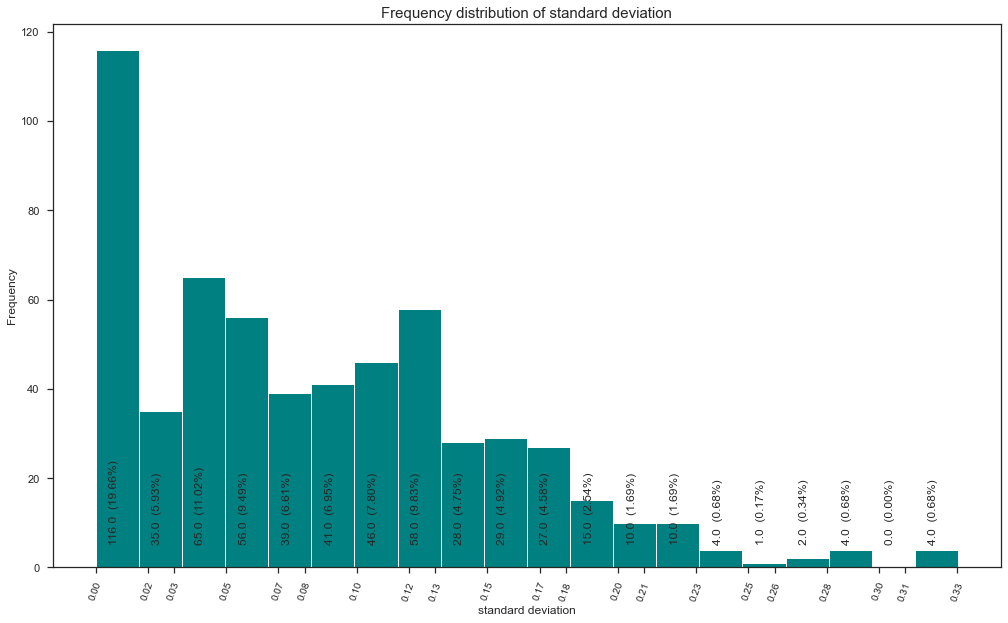

In [ ]:
# Volatility graph after splitting data without line
# Colours for different percentiles

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(17,10))

counts, bins, patches = ax.hist(df_eda_2['std'], color = 'teal', bins=20, edgecolor='white')

ax.set_xticks(bins.round(2))
plt.xticks(rotation=70,fontsize=10)

# Set the graph title and axes titles
ax.set_title('Frequency distribution of standard deviation', fontsize=15)
ax.set_xlabel('standard deviation', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

# Annotation for bar values
ax.annotate('Each bar shows count and percentage of total',
            xy=(.85,.30), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=10, bbox=dict(boxstyle="round", fc="white"),
            rotation=-90)


Text(0.85, 0.3, 'Each bar shows count and percentage of total')

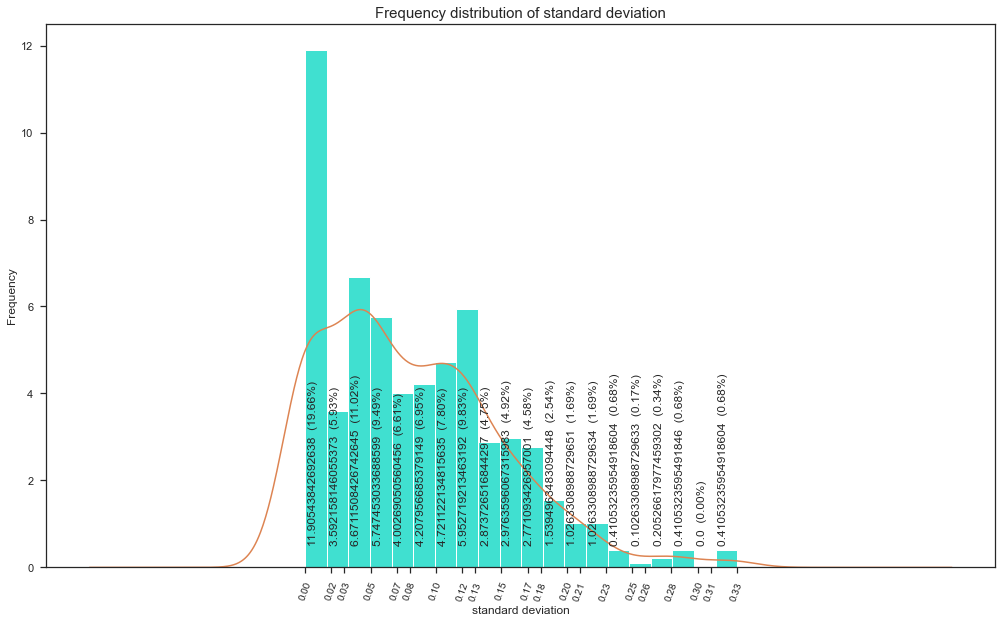

In [ ]:
# Volatility after splitting data 
# Colours for different percentiles
perc_25_colour = 'aquamarine'
perc_50_colour = 'turquoise'
perc_75_colour = 'lightseagreen'
perc_95_colour = 'mediumturquoise'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(17,10))

counts, bins, patches = ax.hist(df_eda_2['std'], facecolor=perc_50_colour, bins=20, edgecolor='white',density=True)

df_eda['std'].plot(kind = "kde")


# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70,fontsize=10)

# Set the graph title and axes titles
ax.set_title('Frequency distribution of standard deviation', fontsize=15)
ax.set_xlabel('standard deviation', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

# Annotation for bar values
ax.annotate('Each bar shows count and percentage of total',
            xy=(.85,.30), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=10, bbox=dict(boxstyle="round", fc="white"),
            rotation=-90)


In [ ]:
# Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# create test set
from sklearn.model_selection import train_test_split

# to keep track of training time
import datetime

# standard scaler
from sklearn.preprocessing import StandardScaler

# logistic regression model
from sklearn.linear_model import LogisticRegression

# metrics used for evaluation
from sklearn.metrics import f1_score, matthews_corrcoef

# visualizations
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from sklearn.metrics import plot_roc_curve

# KNN imputation
from sklearn.impute import KNNImputer

# normalizer
from sklearn.preprocessing import Normalizer

# variance threshold
from sklearn.feature_selection import VarianceThreshold

# RFECV
from sklearn.model_selection import StratifiedKFold

# random forest
from sklearn.ensemble import RandomForestClassifier

# evaluation metric
from sklearn.metrics import matthews_corrcoef, make_scorer

In [ ]:
from yellowbrick.model_selection import RFECV

In [ ]:
def null_values(x_train):
    """a function to show null values with percentage"""
    nv=pd.concat([x_train.isnull().sum(), 100 * x_train.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [ ]:
x_train_na = null_values(df_features)
x_train_na

,Missing_Records,Percentage (%)
feature293,1429,91.193363
feature294,1429,91.193363
feature158,1429,91.193363
feature159,1429,91.193363
feature359,1341,85.577537
...,...,...
feature457,1,0.063816
feature219,1,0.063816
feature357,1,0.063816
feature458,1,0.063816


In [ ]:
x_train_na

,Missing_Records,Percentage (%)
feature293,1429,91.193363
feature294,1429,91.193363
feature158,1429,91.193363
feature159,1429,91.193363
feature359,1341,85.577537
...,...,...
feature457,1,0.063816
feature219,1,0.063816
feature357,1,0.063816
feature458,1,0.063816


In [ ]:
x_train_na= x_train_na[x_train_na["Percentage (%)"] > 80]
x_train_na

,Missing_Records,Percentage (%)
feature293,1429,91.193363
feature294,1429,91.193363
feature158,1429,91.193363
feature159,1429,91.193363
feature359,1341,85.577537
feature86,1341,85.577537
feature493,1341,85.577537
feature221,1341,85.577537


In [ ]:
x_train_new = x_train.drop(axis=1, columns=x_train_na.index)
x_train_new.shape

(1253, 582)

In [ ]:
xtrain_eda1[xtrain_eda1['std']==0]

,mean,std,percent_null,unique,count_3s,count_2s,min,q25,q50,q75,max,skewness,kurtosis
feature6,100.0,0.0,0.798085,2,0.0,0.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0
feature14,0.0,0.0,0.159617,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature43,70.0,0.0,0.000000,1,0.0,0.0,70.0,70.0,70.0,70.0,70.0,0.0,0.0
feature50,1.0,0.0,0.000000,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
feature53,0.0,0.0,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature535,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature536,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature537,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature538,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:


x_train_std= xtrain_eda1[xtrain_eda1["std"] == 0]
x_train_std

,mean,std,percent_null,unique,count_3s,count_2s,min,q25,q50,q75,max,skewness,kurtosis
feature6,100.0,0.0,0.798085,2,0.0,0.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0
feature14,0.0,0.0,0.159617,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature43,70.0,0.0,0.000000,1,0.0,0.0,70.0,70.0,70.0,70.0,70.0,0.0,0.0
feature50,1.0,0.0,0.000000,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
feature53,0.0,0.0,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature535,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature536,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature537,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature538,0.0,0.0,0.478851,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train_new_2 = x_train.drop(axis=1, columns=x_train_std.index)
x_train_new_2.shape

(1253, 474)

In [ ]:
x_train_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 443 to 181
Columns: 474 entries, feature1 to feature590
dtypes: float64(474)
memory usage: 4.5 MB


In [ ]:
print(x_train_new_2.isnull().sum())

feature1       5
feature2       6
feature3      10
feature4      10
feature5      10
              ..
feature586     1
feature587     1
feature588     1
feature589     1
feature590     1
Length: 474, dtype: int64


In [ ]:
x_train_new_2.std(axis=0,skipna = True)

feature1       73.877303
feature2       79.188651
feature3       29.939025
feature4      436.632421
feature5       54.572445
                 ...    
feature586      3.968128
feature587      0.012421
feature588      0.008698
feature589      0.002850
feature590     92.379122
Length: 474, dtype: float64

In [ ]:
x_train_new_2.mean(skipna = True)

feature1      3014.113686
feature2      2496.400585
feature3      2200.216525
feature4      1394.907987
feature5         4.018582
                 ...     
feature586       3.084501
feature587       0.021521
feature588       0.016344
feature589       0.005248
feature590      98.616399
Length: 474, dtype: float64

In [ ]:
mean = x_train_new_2[col].mean(skipna = True)
std_dev = x_train_new_2[col].std(axis=0,skipna = True)

In [ ]:
mean

98.61639944089444

In [ ]:
std_dev

92.37912176630172

In [ ]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python
from scipy import stats # it contains a large number of statistics, probability distributions functions
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split # for separating train and test data, scaling, model building, ...
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.model_selection import GridSearchCV # Exhaustive search over specified parameter values for an estimator
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn.metrics import accuracy_score # Accuracy classification score
from sklearn.ensemble import RandomForestClassifier # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

import statistics as st # This module provides functions for calculating mathematical statistics of numeric (Real-valued) data.
from sklearn.impute import SimpleImputer # to impute missing in cat cols
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # to show confusion matrix
from sklearn import metrics # Evaluate ROC curve
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer

In [ ]:
z_train= pd.DataFrame(stats.zscore(x_train_new_2,nan_policy='omit'))


In [ ]:
z_train

,0,1,2,3,4,5,6,7,8,9,...,464,465,466,467,468,469,470,471,472,473
0,0.889077,-1.792523,0.228151,-0.287085,-0.041457,-0.648158,0.018687,-0.048793,1.082867,0.982588,...,0.168891,-0.325262,-0.003166,-0.230969,-0.111882,-0.225537,0.537910,0.351456,0.228897,-0.323492
1,-0.172703,-0.065321,-1.500500,-1.092186,-0.050289,0.640429,0.093978,-0.591421,-0.291769,0.086106,...,NaN,NaN,-1.693659,0.236669,0.081861,0.238822,-0.372208,1.294526,1.001159,0.708055
2,0.388182,-1.497161,-0.894207,0.088818,-0.054778,1.522245,0.319853,0.434295,1.408264,1.414628,...,NaN,NaN,-1.139877,-0.209952,-0.111882,-0.200880,-0.058097,1.421036,1.352187,0.429594
3,0.061293,-1.195102,0.794717,0.263879,-0.045050,-0.196994,-0.257382,-0.291013,-0.676932,1.068996,...,-0.499388,-0.541000,1.337570,-0.278259,-0.184536,-0.275252,0.554018,-0.258090,-0.508262,-0.529199
4,0.083636,-0.788442,0.587917,0.801612,-0.056036,-0.140998,-0.018959,0.415351,-0.590603,-0.605158,...,NaN,NaN,0.259152,-0.036558,-0.063446,-0.037993,-0.404425,-0.568613,-0.332748,-0.320864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.584938,-0.187862,0.491756,0.615856,-0.054963,-0.098194,0.344950,0.252968,-2.124616,0.496544,...,NaN,NaN,1.046105,0.110564,0.009207,0.098095,0.384881,-0.534110,-0.683776,-0.587465
1249,-0.059632,0.873321,0.817365,-0.197637,-0.048173,0.012177,-0.144445,-0.274775,-0.471069,-0.842779,...,NaN,NaN,-0.644388,-0.399109,-0.354062,-0.381214,0.481531,0.592974,0.825645,-0.221962
1250,0.273892,1.706351,-0.707456,1.451032,-0.045158,-0.903872,0.181819,-0.489932,0.378947,0.971787,...,NaN,NaN,-0.964998,-0.136391,-0.087664,-0.126458,0.666776,-0.545611,-0.473159,-0.645840
1251,0.150259,0.087161,-0.684440,3.873168,-0.046458,-3.019001,0.357499,-1.293725,-0.411302,-0.378337,...,-1.199489,-0.582357,0.521470,0.021240,0.106079,0.014698,-0.766861,-1.247163,-1.280524,-0.568633


In [ ]:
x_train_new_2

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,feature11,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
443,3079.77,2354.51,2207.0444,1269.6078,1.7571,97.0189,0.1221,1.4607,0.0155,0.0093,...,0.0059,68.7444,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
760,3001.36,2491.23,2155.3111,918.2161,1.2753,105.0478,0.1227,1.4206,-0.0052,0.0010,...,NaN,NaN,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
479,3042.78,2377.89,2173.4556,1433.6732,1.0304,110.5422,0.1245,1.4964,0.0204,0.0133,...,NaN,NaN,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
362,3018.64,2401.80,2224.0000,1510.0797,1.5611,99.8300,0.1199,1.4428,-0.0110,0.0101,...,0.0038,49.7490,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
662,3020.29,2433.99,2217.8111,1744.7771,0.9618,100.1789,0.1218,1.4950,-0.0097,-0.0054,...,NaN,NaN,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,3057.31,2481.53,2214.9333,1663.7024,1.0203,100.4456,0.1247,1.4830,-0.0328,0.0048,...,NaN,NaN,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
821,3009.71,2565.53,2224.6778,1308.6479,1.3907,101.1333,0.1208,1.4440,-0.0079,-0.0076,...,NaN,NaN,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
213,3034.34,2631.47,2179.0445,2028.2208,1.5552,95.4256,0.1234,1.4281,0.0049,0.0092,...,NaN,NaN,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1556,3025.21,2503.30,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3687,-0.0070,-0.0033,...,0.0016,46.1076,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


In [ ]:
def replace_outlier(val, mean, std):
    if val > mean + 3*std:
        return mean + 3*std 
    elif val < mean - 3*std:
        return mean - 3*std
    else
    return val

for col in x_train_new_2.columns:
    mean = x_train_new_2[col].mean(skipna = True)
    std_dev = x_train_new_2[col].std(axis=0,skipna = True)
    x_train_new_2[col] = x_train_new_2[col].map(lambda x: replace_outlier(x, mean, std_dev))

SyntaxError: invalid syntax (Temp/ipykernel_16392/1177444436.py, line 6)

In [ ]:
x_train_new_2

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,feature11,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
443,3079.77,2354.51,2207.0444,1269.607800,1.7571,97.018900,0.1221,1.4607,0.0155,0.0093,...,0.0059,68.7444,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
760,3001.36,2491.23,2155.3111,918.216100,1.2753,105.047800,0.1227,1.4206,-0.0052,0.0010,...,NaN,NaN,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
479,3042.78,2377.89,2173.4556,1433.673200,1.0304,110.542200,0.1245,1.4964,0.0204,0.0133,...,NaN,NaN,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
362,3018.64,2401.80,2224.0000,1510.079700,1.5611,99.830000,0.1199,1.4428,-0.0110,0.0101,...,0.0038,49.7490,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
662,3020.29,2433.99,2217.8111,1744.777100,0.9618,100.178900,0.1218,1.4950,-0.0097,-0.0054,...,NaN,NaN,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,3057.31,2481.53,2214.9333,1663.702400,1.0203,100.445600,0.1247,1.4830,-0.0328,0.0048,...,NaN,NaN,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
821,3009.71,2565.53,2224.6778,1308.647900,1.3907,101.133300,0.1208,1.4440,-0.0079,-0.0076,...,NaN,NaN,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
213,3034.34,2631.47,2179.0445,2028.220800,1.5552,95.425600,0.1234,1.4281,0.0049,0.0092,...,NaN,NaN,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1556,3025.21,2503.30,2179.7333,2704.805249,1.4843,82.357569,0.1248,1.3687,-0.0070,-0.0033,...,0.0016,46.1076,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


In [ ]:
a= x_train_new_2['feature4'].mean()

In [ ]:
b =x_train_new_2['feature4'].std()*3

In [ ]:
a+b

2603.463959428256

In [ ]:
x_train_new_2['feature4'].max()

2704.805249217132

In [ ]:
#z_scores = pd.DataFrame(stats.zscore(df))
#z_scores.fillna(0, inplace=True)
#z_scores = np.abs(z_scores < 3).all(axis=1)
#filtered_df = df[z_scores]

In [ ]:
#def z_score(df):
        #x_train_new_2.columns = [x + "_zscore" for x in x_train_new_2.columns.tolist()]   
       # return ((x_train_new_2 - x_train_new_2.mean())/x_train_new_2.std(ddof=0))

In [ ]:
#SMOTE
# apply SMOTE to balance train data
# from imblearn.over_sampling import SMOTE 

# sm = SMOTE(random_state=42)

# X_sm, y_sm = sm.fit_resample(X_train, y_train)
# np.bincount(y_sm)

# print(f'''Shape of X before SMOTE: {X_train.shape}
# Shape of X after SMOTE: {X_sm.shape}''')

# print('\nBalance of positive and negative classes (%):')
# y_sm.value_counts(normalize=True) * 100

In [ ]:
# impute missing values and save it as a temporary dataset.
# imputer = KNNImputer()
# imputer.fit(X_train_notime)
# imputed_train = pd.DataFrame(imputer.transform(X_train_notime), columns = X_train_notime.columns)
# imputed_test = pd.DataFrame(imputer.transform(X_test_notime), columns = X_test_notime.columns)

In [ ]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [ ]:
df_na2= null_values(x_train)


In [ ]:
#descriptive analysis
def eda(df,output):
    #output={}
    for col in df.columns:
        mean=df[col].mean()
        std= df[col].std()
        percent_null= pd.isnull(df[col]).sum()/len(df[col])*100
        unique=len(pd.unique(df[col]))
        outlier_df3= df[(np.abs(stats.zscore(df[col])) > 3)]
        outlier_df2= df[(np.abs(stats.zscore(df[col])) > 2)]
        count_3s_perc=len(outlier_df3)*100/len(df)
        count_2s_perc=(len(outlier_df2)-len(outlier_df3))*100/len(df)
        min= df[col].min()
        q25=df[col].quantile(0.25)
        q50=df[col].quantile(0.5)
        q75=df[col].quantile(0.75)
        max= df[col].max()
        skewness=df[col].skew()
        kurtosis=df[col].kurtosis()
        list = []
        list.append(mean)
        list.append(std)
        list.append(percent_null)
        list.append(unique)
        list.append(count_3s_perc)
        list.append(count_2s_perc)
        list.append(min)
        list.append(q25)
        list.append(q50)
        list.append(q75)
        list.append(max)
        list.append(skewness)
        list.append(kurtosis)
        output[col] = list
    return output;

In [ ]:
#dictionary for EDA
result={}
result=eda(x_train,result)
result2=pd.DataFrame.from_dict(result,orient='index')
result2.columns=['mean','std', 'percent_null', 'unique', 'count_3s_perc', 'count_2s_perc', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']
result2

,mean,std,percent_null,unique,count_3s_perc,count_2s_perc,min,q25,q50,q75,max,skewness,kurtosis
feature1,3014.113686,73.877303,0.399042,1227,0.0,0.0,2743.2400,2966.2300,3011.40500,3056.310000,3356.3500,0.543580,1.589958
feature2,2496.400585,79.188651,0.478851,1213,0.0,0.0,2162.8700,2452.3350,2500.38000,2539.600000,2846.4400,-0.050951,2.281719
feature3,2200.216525,29.939025,0.798085,479,0.0,0.0,2060.6600,2180.8611,2200.98890,2218.055500,2315.2667,-0.393137,2.541922
feature4,1394.907987,436.632421,0.798085,490,0.0,0.0,0.0000,1083.8858,1283.43680,1593.122000,3715.0417,1.609379,4.102406
feature5,4.018582,54.572445,0.798085,478,0.0,0.0,0.6815,1.0160,1.31710,1.525700,1114.5366,20.304107,410.943471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature586,3.084501,3.968128,0.079808,1208,0.0,0.0,1.1975,2.3058,2.74655,3.258475,99.3032,22.636508,545.053032
feature587,0.021521,0.012421,0.079808,306,0.0,0.0,-0.0060,0.0134,0.02070,0.027600,0.1028,1.571819,7.780914
feature588,0.016344,0.008698,0.079808,249,0.0,0.0,0.0042,0.0106,0.01480,0.019800,0.0799,2.082862,8.230885
feature589,0.005248,0.002850,0.079808,117,0.0,0.0,0.0012,0.0033,0.00460,0.006300,0.0286,2.137793,9.345498


In [ ]:
pd.set_option('display.max_rows', result2.shape[0]+1)

In [ ]:
print(result2)

                   mean          std  percent_null  unique  count_3s_perc  \
feature1    3014.113686    73.877303      0.399042    1227       0.000000   
feature2    2496.400585    79.188651      0.478851    1213       0.000000   
feature3    2200.216525    29.939025      0.798085     479       0.000000   
feature4    1394.907987   436.632421      0.798085     490       0.000000   
feature5       4.018582    54.572445      0.798085     478       0.000000   
feature6     100.000000     0.000000      0.798085       2       0.000000   
feature7     101.057428     6.233286      0.798085     482       0.000000   
feature8       0.121951     0.007972      0.478851      88       0.000000   
feature9       1.464306     0.073929      0.079808    1008       0.000000   
feature10     -0.000806     0.015065      0.079808     524       0.000000   
feature11      0.000203     0.009262      0.079808     367       0.000000   
feature12      0.964557     0.009628      0.079808     365       0.000000   

In [ ]:
result2['std'].max()

6597.4466166689035

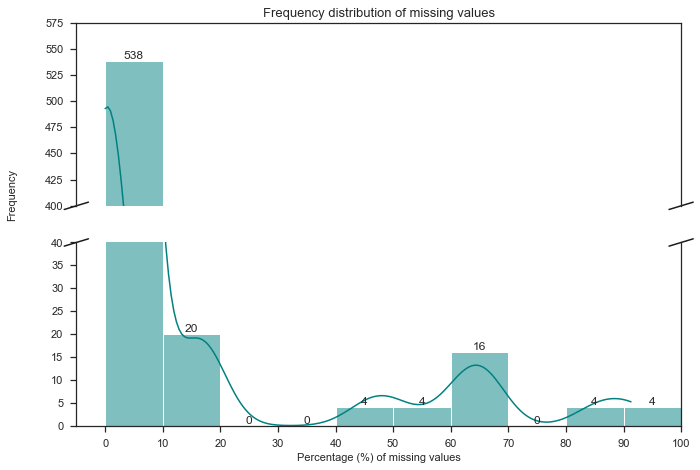

In [ ]:
#broken axis bar chart for percentage of missing values before splitting data 
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")

pal = sns.color_palette(n_colors=3)

f, (ax1,ax2)= plt.subplots(2,1,sharex = True,sharey=False,figsize=(12, 8))
ax1 = sns.histplot(x="percent_null",
                   data=result2, palette=pal, ax=ax1,kde= True, bins=(0,10,20,30,40,50,60,70,80,90,100),color="teal")
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")

ax2 = sns.histplot(x="percent_null",
                   data=result2, palette=pal, ax=ax2,kde= True,bins=(0,10,20,30,40,50,60,70,80,90,100), color="teal")

ax1.set_title('Frequency distribution of missing values', fontsize=13)

ax2.bar_label(ax2.containers[0])
ax1.bar_label(ax1.containers[0])

plt.xticks(rotation=0,fontsize=11)

ax1.set_ylim(400, 575)
ax2.set_ylim(0, 40)
plt.xlim(-5, 100)
plt.xticks([0, 10,20, 30, 40, 50, 60, 70, 80,90, 100, ])

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Percentage (%) of missing values",size=11)
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.07, 0.55,"Frequency", va="center", rotation="vertical",size=11)

ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.show()

In [ ]:
df_features_scaled2 = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
df_features_scaled2

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,0.548890,0.280352,0.574943,0.341748,0.000966,0.0,0.315948,0.949456,0.579502,0.537023,...,0.171533,0.093237,0.696875,0.010625,0.015579,0.010116,0.314338,0.200793,0.171533,0.093237
1,0.421001,0.480360,0.371754,0.247162,0.000533,0.0,0.486336,0.954121,0.493339,0.375682,...,NaN,NaN,0.515625,0.029537,0.023369,0.028890,0.210478,0.309115,0.251825,0.222431
2,0.488558,0.314554,0.443019,0.385910,0.000313,0.0,0.602938,0.968118,0.656210,0.575214,...,NaN,NaN,0.575000,0.011475,0.015579,0.011113,0.246324,0.323646,0.288321,0.187556
3,0.449185,0.349533,0.641538,0.406477,0.000790,0.0,0.375605,0.932348,0.541040,0.330475,...,0.094891,0.067474,0.840625,0.008712,0.012658,0.008106,0.316176,0.130779,0.094891,0.067474
4,0.451876,0.396624,0.617231,0.469652,0.000252,0.0,0.383009,0.947123,0.653202,0.340608,...,NaN,NaN,0.725000,0.018487,0.017527,0.017698,0.206801,0.095112,0.113139,0.093567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.512257,0.466170,0.605928,0.447829,0.000304,0.0,0.388669,0.969673,0.627417,0.160561,...,NaN,NaN,0.809375,0.024437,0.020448,0.023200,0.296875,0.099075,0.076642,0.060177
1249,0.434620,0.589055,0.644201,0.352257,0.000637,0.0,0.403263,0.939347,0.543618,0.354638,...,NaN,NaN,0.628125,0.003825,0.005842,0.003821,0.307904,0.228534,0.233577,0.105953
1250,0.474792,0.685519,0.464970,0.545948,0.000784,0.0,0.282135,0.959565,0.509454,0.454404,...,NaN,NaN,0.593750,0.014450,0.016553,0.014122,0.329044,0.097754,0.098540,0.052866
1251,0.459901,0.498018,0.467675,0.830510,0.000721,0.0,0.002453,0.970451,0.381822,0.361652,...,0.014599,0.062535,0.753125,0.020824,0.024343,0.019829,0.165441,0.017173,0.014599,0.062535
